# Polynomial Approximation with Derivatives

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from math import factorial

## A Brief Intro to `sympy`

Here we import `sympy`, a package for symbolic computation with Python.

In [2]:
import sympy as sp
sp.init_printing()

Next, we make a (symbolic) variable $x$ from which we can then build more complicated expressions:

In [3]:
sp.var("x")
x

Build up an expression with $x$. Assign it to `expr`. Observe that this expression isn't evaluated--the result of this computation is some Python data that represents the computation:

In [4]:
expr = sp.sin(sp.sqrt(x)+2)**2
expr

Next, take a derivative, using `.diff(x)`.

In [5]:
expr.diff(x)

Take 10th derivative:

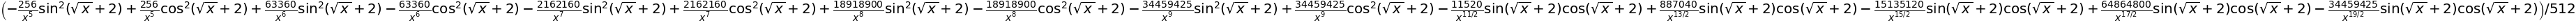

In [6]:
expr.diff(x, 10)

Use `.subs(x, ...)` and `.evalf()` to evaluate your expression for $x=1$.

In [7]:
expr.subs(x,1)

In [8]:
expr.subs(x, 1).evalf()

## Polynomial Approximation

Here are some functions to play with:

In [9]:
#f = sp.exp(x)
f = sp.sqrt(1-x**2)
#f = 1/(20*x-10)

In [10]:
f

Plot `f`:

In [11]:
def plot_sympy(my_f, my_pts, **kwargs):
    f_values = np.array([my_f.subs(x, pt) for pt in my_pts])
    plt.plot(pts, f_values, **kwargs)


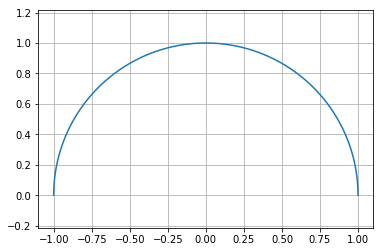

In [12]:
pts = np.linspace(-1, 1, 1000)
plot_sympy(f, pts)
plt.ylim([-1.3, 1.3])
plt.axis('equal')
plt.grid()

The [Taylor polynomial](https://en.wikipedia.org/wiki/Taylor%27s_theorem) uses derivatives to *automatically* get close to the function--the closer the higher you increase the degree.

Write out the degree 4 Taylor polynomial about 0, call it `taylor4`:

In [13]:
taylor4 = (
    f.subs(x, 0)
    + f.diff(x).subs(x, 0) * x
    + f.diff(x, 2).subs(x, 0)/2 * x**2
    + f.diff(x, 3).subs(x, 0)/6 * x**3
    + f.diff(x, 4).subs(x, 0)/24 * x**4
)
taylor4

Text(0,0.5,'function values')

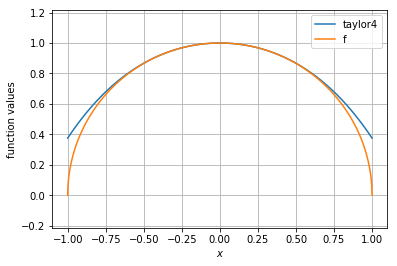

In [14]:
plot_sympy(taylor4, pts, label="taylor4")
plot_sympy(f, pts, label="f")
plt.legend(loc="best")
plt.ylim([-1.3, 1.3])
plt.axis('equal')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('function values')

Now write code to do this for any order `n`. Put the result in `taylor`:

In [15]:
n = 20

In [17]:
taylor

Text(0,0.5,'function values')

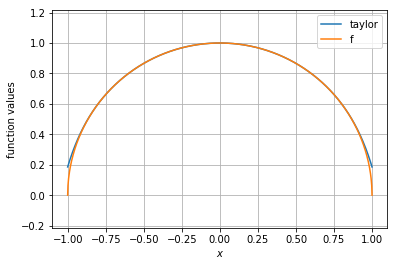

In [18]:
plot_sympy(taylor, pts, label="taylor")
plot_sympy(f, pts, label="f")
plt.legend(loc="best")
plt.ylim([-1.3, 1.3])
plt.axis('equal')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('function values')

## Behavior of the Error (Part II)

Let's repeat the setup, for clarity:

In [19]:
#f = sp.exp(x)
f = sp.sqrt(1-x**2)
#f = 1/(20*x-10)

In [20]:
n = 4

taylor = 0
for i in range(n):
    taylor += f.diff(x, i).subs(x, 0)/factorial(i) * x**i
    
error = taylor - f

In [21]:
taylor

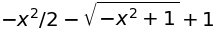

In [22]:
error

Text(0,0.5,'function values')

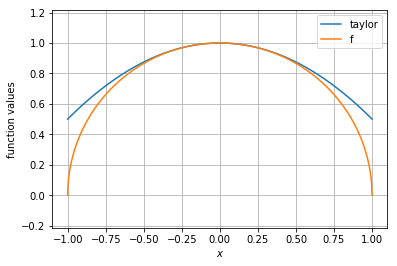

In [23]:
plot_sympy(taylor, pts, label="taylor")
plot_sympy(f, pts, label="f")
plt.legend(loc="best")
plt.ylim([-1.3, 1.3])
plt.axis('equal')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('function values')

Text(0,0.5,'error')

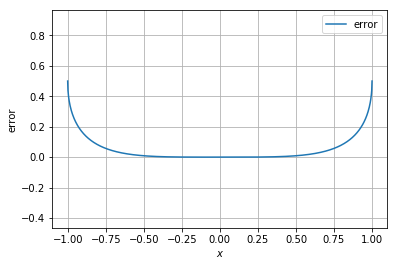

In [24]:
plot_sympy(error, pts, label="error")
plt.legend(loc="best")
plt.ylim([-1.3, 1.3])
plt.axis('equal')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('error')

* To get a better idea of what happens close to the center, use a log-log plot:

Text(0,0.5,'Error')

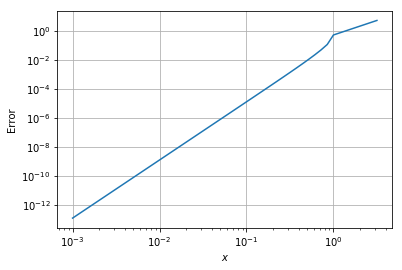

In [25]:
# plot only points close to zero [10^(-3),10^(0.5)]
pos_pts = 10**np.linspace(-3, 0.5) 
err_values = [abs(error.subs(x, pt)) for pt in pos_pts]
plt.loglog(pos_pts, err_values)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("Error")

* What is the behavior of the error as we get very close to the expansion center?
* Is there any predictive power in what we just observed?

## Predicting Taylor Error (Part III)

In [26]:
f = sp.sqrt(x-10)
t = sum([f.diff(x, i).subs(x, 12)/factorial(i) * (x-12)**i for i in range(4)])
t

In [27]:
f.subs(x, 12.5)

In [28]:
t.subs(x, 12.5).evalf()

In [29]:
error1 = f.subs(x, 12.5) - t.subs(x, 12.5).evalf()
abs(error1)

Now predict the error at $12.25$:

In [31]:
error2 = f.subs(x, 12.25) - t.subs(x, 12.25).evalf()
abs(error2)